# winsorisation
La winsorisation est le processus de transformation des données en limitant les valeurs extrêmes, c'est-à-dire les valeurs aberrantes, à une certaine valeur arbitraire, plus proche de la moyenne de la distribution. La winsorisation est différente du Trimming car les valeurs extrêmes ne sont pas supprimées, mais sont plutôt remplacées par d'autres valeurs. Une stratégie typique consiste à définir des valeurs aberrantes à un centile spécifié.

Par exemple, avec une winsorisation à 90 %, nous définissons toutes les données inférieures au 5e centile à la valeur au 5e centile et toutes les données au-dessus du 95e centile à la valeur au 95e centile. La winsorisation est symétrique ; par conséquent, la moyenne winsorisée d'une distribution symétrique fournit une représentation non biaisée de la distribution de la variable. Dans cette recette, nous effectuerons la winsorisation à l'aide de pandas, NumPy.

In [1]:
!pip install feature_engine

     |████████████████████████████████| 179 kB 8.4 MB/s 
     |████████████████████████████████| 9.5 MB 24.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
#Importez les bibliothèques Python requises :
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston
from feature_engine.outliers import Winsorizer

Chargeons l'ensemble de données sur les prix des maisons de Boston à partir de scikit-learn :

In [6]:

# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


Si vous faites un graphique Q-Q et un boxplot de la variable RM avant et après la winsorisation, vous pouvez facilement voir comment les valeurs extrêmes sont remplacées par les centiles.

In [7]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


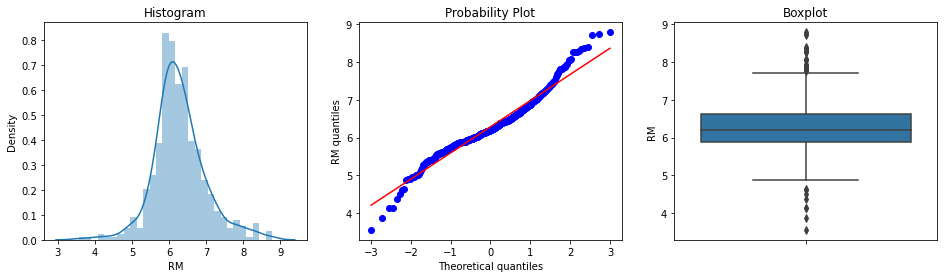

In [8]:
# let's find outliers in RM
diagnostic_plots(boston, 'RM')

Créons une fonction pour winsoriser une variable à des limites supérieure et inférieure arbitraires :

In [10]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [11]:
#Winsorize la variable RM :
# Now let's replace the outliers by the percentiles
boston['RM']= winsorise(boston, 'RM', boston['RM'].quantile(0.95), boston['RM'].quantile(0.05))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


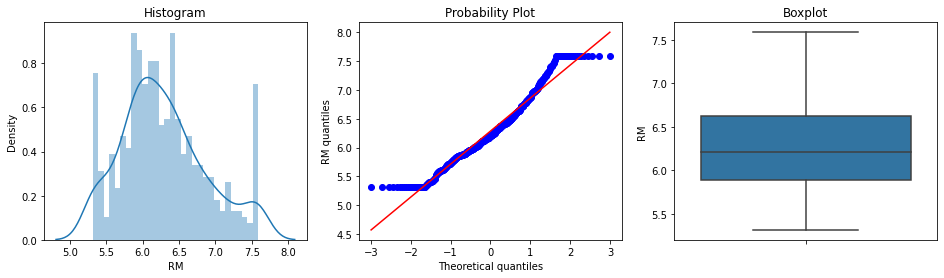

In [13]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset
diagnostic_plots(boston, 'RM')

Nous pouvons winsoriser de nombreuses variables à la fois en utilisant le package open source, Feature-engine. Pour ce faire, nous devons charger les bibliothèques et les données comme nous l'avons fait à l'étape 1 de la recette Ensuite, nous devons importer Feature-engine :

In [14]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


Avec Winsorizer de Feature-engine, nous pouvons remplacer les valeurs par les centiles aux queues gauche et droite ou seulement à l'une des queues en définissant l'argument **tail** sur les deux(**both**), à gauche (**left**) ou à droite (**right**)

In [17]:
# create the capper

windsorizer = Winsorizer(capping_method ='quantiles', 
                         fold = 0.05,
                          tail='both', # cap left, right or both tails 
                          variables=['RM', 'LSTAT', 'CRIM'])

windsorizer.fit(boston)

Winsorizer(capping_method='quantiles', fold=0.05, missing_values='raise',
           tail='both', variables=['RM', 'LSTAT', 'CRIM'])

N'oubliez pas qu'il est recommandé de séparer les données en ensembles d'apprentissage et de test et d'entraîner Winsorizer sur l'ensemble de trains. De cette façon, le transformateur utilisera les centiles appris du train pour plafonner les variables dans le train, le test et toutes les données futures.

In [18]:

boston_t = windsorizer.transform(boston)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


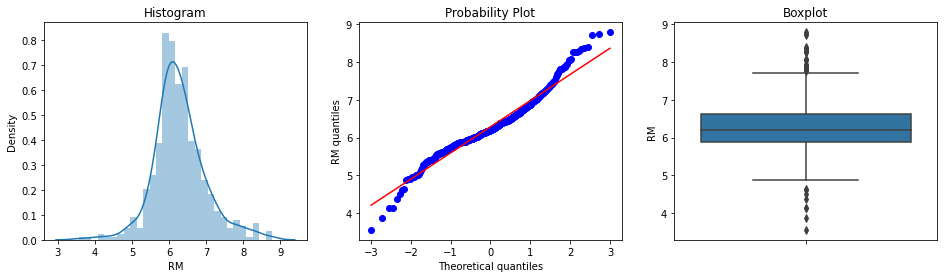

In [19]:
diagnostic_plots(boston, 'RM')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


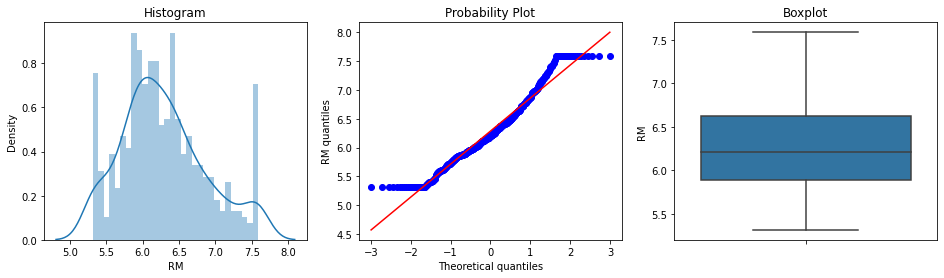

In [20]:
diagnostic_plots(boston_t, 'RM')

In [21]:
# we can inspect the minimum caps for each variable
windsorizer.left_tail_caps_

{'CRIM': 0.027909999999999997, 'LSTAT': 3.7075000000000005, 'RM': 5.314}

In [22]:
# we can inspect the maximum caps for each variable
windsorizer.right_tail_caps_

{'CRIM': 15.78915, 'LSTAT': 26.8075, 'RM': 7.5875}

Dans cette recette, nous avons remplacé les valeurs aberrantes d'une variable de l'ensemble de données Boston House Prices de scikit-learn, par les 5e et 95e centiles. Pour remplacer les valeurs aberrantes, nous avons créé une fonction, qui prend le cadre de données, le nom de la variable et les 5e et 95e centiles et utilise Numpy's where() pour remplacer les valeurs plus grandes ou plus petites que ces centiles par les valeurs de ces centiles.

La fonction where() de NumPy analyse chaque observation et si la valeur est supérieure au 95e centile, elle la remplace par le 95e centile, sinon, il évalue si la valeur est inférieure au 5e centile, il la remplace par le 5e centile. Sinon, il conserve la valeur d'origine.